# 1.1 Load and explore dataset 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/changeDEEPly/data/train.csv')

(6410, 6)

In [ ]:
df.shape

(29165540, 9)

**drop column unnamed and enroll_id**

In [ ]:
df = df.drop(['Unnamed: 0','enroll_id','object'],axis =1)

In [ ]:
df.describe()

,username,truth
count,2.916554e+07,2.916554e+07
mean,1.719777e+06,3.825415e-01
std,1.554870e+06,4.860077e-01
min,5.000000e+00,0.000000e+00
25%,5.173930e+05,0.000000e+00
50%,1.092414e+06,0.000000e+00
75%,2.636514e+06,1.000000e+00
max,7.036067e+06,1.000000e+00


In [ ]:
df.head()

,username,course_id,session_id,action,time,truth
0,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_about,2015-09-27T15:42:59,1
1,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_info,2015-09-27T15:43:12,1
2,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,pause_video,2015-10-19T19:37:42,1
3,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,load_video,2015-10-19T19:33:27,1
4,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,play_video,2015-10-19T19:33:30,1


In [ ]:
#find unique values
df.nunique()

username         69823
course_id          247
session_id      292480
action              22
time          12273922
truth                2
dtype: int64

In [ ]:
#find nullable columns
df.isnull().sum()

username      0
course_id     0
session_id    0
action        0
time          0
truth         0
dtype: int64

In [ ]:
#dtypes of the dataframe
df.dtypes

username       int64
course_id     object
session_id    object
action        object
time          object
truth          int64
dtype: object

In [ ]:
#unique action items
df['action'].unique()

array(['click_about', 'click_info', 'pause_video', 'load_video',
       'play_video', 'seek_video', 'click_courseware', 'close_courseware',
       'stop_video', 'click_progress', 'click_forum', 'create_thread',
       'create_comment', 'problem_get', 'delete_thread', 'problem_check',
       'problem_check_correct', 'problem_check_incorrect', 'problem_save',
       'delete_comment', 'reset_problem', 'close_forum'], dtype=object)

In [ ]:
#total actions performed
temp = df.groupby(['action'])['action'].count()


In [ ]:
temp = temp.to_frame(name = 'count').reset_index()

In [ ]:
temp

,action,count
0,click_about,505156
1,click_courseware,3978918
2,click_forum,187465
3,click_info,731306
4,click_progress,198285
5,close_courseware,2019214
6,close_forum,4
7,create_comment,34015
8,create_thread,6437
9,delete_comment,871


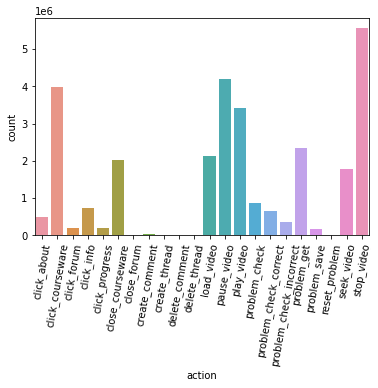

In [ ]:
plt.xticks(rotation=80)
sns.barplot(x=temp['action'] , y= temp['count'])

In [ ]:
# convert time object to datetime
df['time'] = pd.to_datetime(df['time'])

In [ ]:
df['time']

0          2015-09-27 15:42:59
1          2015-09-27 15:43:12
2          2015-10-19 19:37:42
3          2015-10-19 19:33:27
4          2015-10-19 19:33:30
                   ...        
29165535   2016-04-01 21:04:38
29165536   2016-04-01 21:04:38
29165537   2016-04-01 21:04:38
29165538   2016-04-01 21:04:38
29165539   2016-03-02 20:21:55
Name: time, Length: 29165540, dtype: datetime64[ns]

In [ ]:
# time difference between 2 consecutive timestamps..
# the df is not ordered as per timestamp
df['time'][0]-df['time'][1]

Timedelta('-1 days +23:59:47')

In [ ]:
# number of sessions per user id
df.groupby('username')['session_id'].count().sort_values(ascending=False)

username
720244     129058
272457      79275
3053378     66614
486806      59182
511797      51688
            ...  
1507431         1
596806          1
596921          1
2751988         1
5435440         1
Name: session_id, Length: 69823, dtype: int64

In [ ]:
# number of sessions per course id
df.groupby(['username','course_id'])['session_id'].count().sort_values(ascending=False)

username  course_id                                    
720244    course-v1:TsinghuaX+20120143X_2015_T2+2015_T2    128992
272457    TsinghuaX/THU00013X/_                             67953
486806    TsinghuaX/34100325X/2015_T1                       58917
3053378   course-v1:TsinghuaX+30640014+2016_T2              56494
755122    TsinghuaX/34100325X/2015_T1                       47182
                                                            ...  
1477890   course-v1:TsinghuaX+00740043X_2015_T2+2015_T2         1
283880    course-v1:TsinghuaX+30640014+2015_T2                  1
47516     TsinghuaX/60510102X/_                                 1
1095257   course-v1:TsinghuaX+00740043X_2015_T2+2015_T2         1
296245    course-v1:TsinghuaX+10421094X_2015_2+2015_T2          1
Name: session_id, Length: 157943, dtype: int64

# 1.2 Analysis of dataset


## 1.2.1 Percentage of dropouts and non-dropouts

In [ ]:
#users who completed the course
user_0 = df[df['truth'] == 0]['username'].unique()


In [ ]:
user_0.shape

(25638,)

In [ ]:
#users who dropped out of the course
user_1 = df[df['truth'] == 1]['username'].unique()

In [ ]:
user_1.shape

(59468,)

In [ ]:
# % dropouts
percentage_of_dropout = len(user_1)/df['username'].nunique()
percentage_of_dropout


0.8516964324076594

In [ ]:
percentage_non_dropout = len(user_0)/df['username'].nunique()
percentage_non_dropout

0.3671855978688971

In [ ]:
#total number of users who completed some of the courses and dropped out of some
user_0_1 = np.intersect1d(user_0, user_1 )
user_0_1.shape

(15283,)

In [ ]:
#percentage of users who completed and dropped out
percentage_of_both = len(user_0_1)/df['username'].nunique()
percentage_of_both

0.21888203027655642

## Distribution of actions per course

In [ ]:
df.groupby('')

# Seperate the df into 2 dfs, one with dropouts and one without dropouts

In [ ]:
df_0 = df[df['truth'] == 0]
df_0.shape

(18008512, 6)

In [ ]:
df_1 = df[df['truth'] == 1]
df_1.shape

(11157028, 6)

In [ ]:
#check the problem workflow


## 1.2.2 track user behaviour

In [ ]:
#user with maximum interaction with the website
df_1_user_max_interaction = df_1.groupby(['username'])['username'].count().sort_values(ascending=False)
df_1_user_max_interaction

username
720244     129043
272457      69595
3053378     56494
2484699     43601
1643395     38951
            ...  
1135825         1
1545646         1
1019075         1
1658624         1
1535679         1
Name: username, Length: 59468, dtype: int64

### try to analyze on the various actions of this user with maximum interaction to the website
username = 720244


In [ ]:
# how many courses is he enrolled into
tmp720244 = df_1[df_1['username'] == 720244]
tmp720244.shape

(129043, 6)

In [ ]:
#unique actions and courses for this user
tmp720244.nunique()


username           1
course_id          9
session_id         6
action             8
time          129027
truth              1
dtype: int64

In [ ]:
tmp720244.head()

,username,course_id,session_id,action,time,truth
47787,720244,course-v1:TsinghuaX+70800232X+2015_T2,7c6a1912c508be3d9e47386f4c4c57d6,click_about,2015-09-28 10:11:22,1
7741960,720244,TsinghuaX/AP000004X/2015_T2,20eb2ab5e8d85961f424fa7590dd9f8d,load_video,2015-10-19 17:47:46,1
8003140,720244,TsinghuaX/60510102X/_,20eb2ab5e8d85961f424fa7590dd9f8d,load_video,2015-10-19 17:42:05,1
10430440,720244,course-v1:TsinghuaX+00690212X+2015_T2,20eb2ab5e8d85961f424fa7590dd9f8d,click_about,2015-10-19 11:25:37,1
10430441,720244,course-v1:TsinghuaX+00690212X+2015_T2,20eb2ab5e8d85961f424fa7590dd9f8d,click_info,2015-10-19 11:25:48,1


In [ ]:
# find what all actions he perfomed
tmp720244['action'].unique()

array(['click_about', 'load_video', 'click_info', 'problem_get',
       'close_courseware', 'problem_check_incorrect', 'click_courseware',
       'play_video'], dtype=object)

In [ ]:
# how much time did he spend on the platform in total
#tmp720244.dtypes
t_min = tmp720244['time'].min()

t_max = tmp720244['time'].max()
tmp720244_spent_on_platform = t_max - t_min
tmp720244_spent_on_platform ##user was with the platform for these many days

Timedelta('312 days 05:43:31')

In [ ]:
# find how many times he performed each action
tmp1 = tmp720244.groupby(['action'])['action'].count()

In [ ]:
tmp1

action
click_about                    27
click_courseware                8
click_info                     16
close_courseware                8
load_video                      6
play_video                      1
problem_check_incorrect        28
problem_get                128949
Name: action, dtype: int64

In [ ]:
#convert to frame
tmp1 = tmp1.to_frame(name="count")

In [ ]:
tmp1 = tmp1.reset_index()

In [ ]:
### TO DO -- WHY SO MANY ROWs WITH PROBLEM_GET 



In [ ]:
# seems like the 'problem_get' action is having abnormal values, so better to drop it

tmp1 = tmp1[tmp1['action'] != 'problem_get']

In [ ]:
tmp1

,action,count
0,click_about,27
1,click_courseware,8
2,click_info,16
3,close_courseware,8
4,load_video,6
5,play_video,1
6,problem_check_incorrect,28


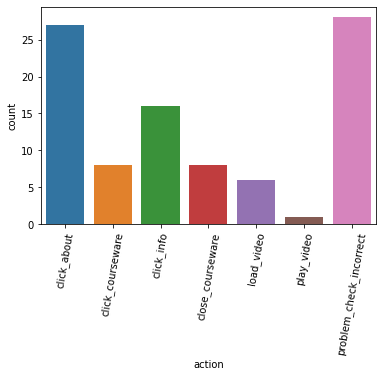

In [ ]:

plt.xticks(rotation=80)
sns.barplot(x = 'action',y = 'count',data = tmp1)

# New Section

In [ ]:
temp1  = df.drop(['session_id'],axis=1)

In [ ]:
# create a temp dataframe for counts
#temp  = df.drop(['session_id'],axis=1)['username','course_id','truth']



In [ ]:
df_course_dropouts = temp.groupby(['course_id'])['truth'].sum()

In [ ]:
temp.groupby(['username','course_id','truth']).sum().sort_values(by=['truth'],ascending=False)

In [ ]:
df_course_dropouts.sort_values(ascending=False)

In [ ]:
df_course_total_enrolled = temp.groupby(['course_id'])['truth'].count()

In [ ]:
df_course_total_enrolled.sort_values(ascending=False)

In [ ]:
df_course_completed = df_course_total_enrolled - df_course_dropouts

In [ ]:
df_course_completed.sort_values(ascending=False)

### explore another user = 272457

In [ ]:
# how many courses is he enrolled into
tmp272457 = df_1[df_1['username'] == 272457]
tmp272457.shape

(69595, 6)

In [ ]:
#unique actions and courses for this user
tmp272457.nunique()

username          1
course_id         3
session_id        3
action           14
time          69487
truth             1
dtype: int64

In [ ]:
# find what all actions he perfomed
tmp272457['action'].unique()

array(['pause_video', 'stop_video', 'play_video', 'seek_video',
       'problem_get', 'load_video', 'problem_check',
       'problem_check_incorrect', 'problem_check_correct',
       'close_courseware', 'create_thread', 'click_courseware',
       'click_about', 'click_info'], dtype=object)

In [ ]:
# how much time did he spend on the platform in total
#tmp272457.dtypes
t_min = tmp272457['time'].min()

t_max = tmp272457['time'].max()
tmp272457_spent_on_platform = t_max - t_min
tmp272457_spent_on_platform ##user was with the platform for these many days

Timedelta('40 days 00:21:23')

In [ ]:
# find how many times he performed each action
tmp2 = tmp272457.groupby(['action'])['action'].count()
tmp2

action
click_about                    2
click_courseware               6
click_info                     2
close_courseware              21
create_thread                  1
load_video                    57
pause_video                  287
play_video                   325
problem_check                 42
problem_check_correct         19
problem_check_incorrect       23
problem_get                   34
seek_video                    25
stop_video                 68751
Name: action, dtype: int64

In [ ]:
#convert to frame
tmp2 = tmp2.to_frame(name="count")

tmp2 = tmp2.reset_index()

In [ ]:
## find why the stop_video is unusually high about 68k whereas the play/pause video is quite less?
########TO DO ########

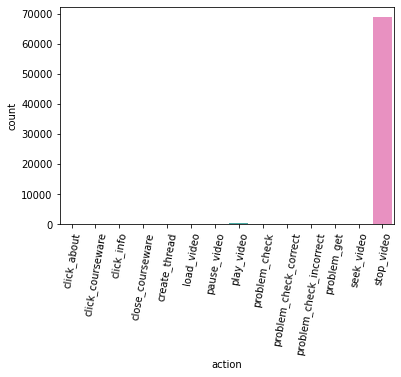

In [ ]:

plt.xticks(rotation=80)
sns.barplot(x = 'action',y = 'count',data = tmp2)

## 1.2.3 how many courses a user enrolled !!PENDING
## which course has the maximum dropout

In [ ]:
#df.head(20)
courses_per_user= df.drop(['session_id'],axis=1).groupby(['username','course_id']).count()


In [ ]:
courses_per_user

## 1.2.4 Most engaging course which has the most actions performed

## 1.2.5 stats of time spent on the course. the max. min and avg time spent

## 1.2.6 Analyzing a single user at random, here username 5

In [ ]:
df_5 = df[df['username'] == 5]

In [ ]:
df_5.shape

(279, 6)

In [ ]:
#find unique values for all features of the user object
df_5.nunique()
## username 5 is enrolled in 8 courses

username        1
course_id       8
session_id      8
action         11
time          246
truth           2
dtype: int64

In [ ]:
# How many sessions per course did the user create?
df_5.groupby(['username','course_id','session_id'])['session_id'].count()

username  course_id                                     session_id                      
5         TsinghuaX/60510102X/_                         c4d05fdd4af11ea45bb4623b2b6fa2c4    11
          TsinghuaX/70240183x/2015_T2                   6ff66b03510e0dc515ea4637216f1ad3    43
          TsinghuaX/80511503X/2015_T2                   c145c0c98fd5a14de370ecbbfacacbaf    51
                                                        fb71ee5553ffb37a7c3dd809b3540e2f     8
          TsinghuaX/80515522X/2015_T1                   c4d05fdd4af11ea45bb4623b2b6fa2c4     3
          course-v1:MicrosoftX+Microsoft101+_           59f58bc2bc80c3c297788fba1659a26f    26
                                                        d1d739518c0b8353af5ba7491020f82f     1
          course-v1:TsinghuaX+00720091X_2015_2+2015_T2  c4d05fdd4af11ea45bb4623b2b6fa2c4    31
          course-v1:TsinghuaX+00804723X+2016_T1         7a4aa45ee44784b026bcb95feacd5685    27
          course-v1:TsinghuaX+70800232X+2016_T1         

In [ ]:
## pick a course for this user and try to analyze
## this user has 2 sessions for this course
df_5[df_5['course_id'] == 'TsinghuaX/80511503X/2015_T2']

,username,course_id,session_id,action,time,truth
7672002,5,TsinghuaX/80511503X/2015_T2,c145c0c98fd5a14de370ecbbfacacbaf,pause_video,2015-11-13 18:04:09,1
7672003,5,TsinghuaX/80511503X/2015_T2,c145c0c98fd5a14de370ecbbfacacbaf,load_video,2015-11-13 18:00:19,1
7672004,5,TsinghuaX/80511503X/2015_T2,fb71ee5553ffb37a7c3dd809b3540e2f,load_video,2015-11-10 12:07:52,1
7672005,5,TsinghuaX/80511503X/2015_T2,fb71ee5553ffb37a7c3dd809b3540e2f,load_video,2015-11-10 12:06:56,1
7672006,5,TsinghuaX/80511503X/2015_T2,c145c0c98fd5a14de370ecbbfacacbaf,pause_video,2015-11-13 18:07:34,1
7672007,5,TsinghuaX/80511503X/2015_T2,c145c0c98fd5a14de370ecbbfacacbaf,play_video,2015-11-13 18:07:35,1
7672008,5,TsinghuaX/80511503X/2015_T2,c145c0c98fd5a14de370ecbbfacacbaf,pause_video,2015-11-13 18:07:57,1
7672009,5,TsinghuaX/80511503X/2015_T2,c145c0c98fd5a14de370ecbbfacacbaf,play_video,2015-11-13 18:07:58,1
7672010,5,TsinghuaX/80511503X/2015_T2,c145c0c98fd5a14de370ecbbfacacbaf,play_video,2015-11-13 18:07:13,1
7672011,5,TsinghuaX/80511503X/2015_T2,c145c0c98fd5a14de370ecbbfacacbaf,pause_video,2015-11-13 18:08:17,1


In [ ]:
## how much time did he spend on the course session


In [ ]:
# how many courses did he complete
df_5.drop(['session_id'],axis =1 ).groupby(['course_id'])['truth'].sum()
## he completed only 3 out of 8 courses

course_id
TsinghuaX/60510102X/_                           11
TsinghuaX/70240183x/2015_T2                     43
TsinghuaX/80511503X/2015_T2                     59
TsinghuaX/80515522X/2015_T1                      0
course-v1:MicrosoftX+Microsoft101+_              0
course-v1:TsinghuaX+00720091X_2015_2+2015_T2    31
course-v1:TsinghuaX+00804723X+2016_T1            0
course-v1:TsinghuaX+70800232X+2016_T1           78
Name: truth, dtype: int64

In [ ]:
## check the rows for one of the completed course
df_5[df['course_id'] == 'course-v1:MicrosoftX+Microsoft101+_'].sort_values(by=['time'],ascending=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,username,course_id,session_id,action,time,truth
16517155,5,course-v1:MicrosoftX+Microsoft101+_,d1d739518c0b8353af5ba7491020f82f,load_video,2015-10-28 10:50:03,0
16517156,5,course-v1:MicrosoftX+Microsoft101+_,59f58bc2bc80c3c297788fba1659a26f,click_about,2015-10-30 18:36:02,0
16517157,5,course-v1:MicrosoftX+Microsoft101+_,59f58bc2bc80c3c297788fba1659a26f,load_video,2015-10-30 18:36:05,0
16517158,5,course-v1:MicrosoftX+Microsoft101+_,59f58bc2bc80c3c297788fba1659a26f,click_about,2015-10-30 18:39:58,0
16517161,5,course-v1:MicrosoftX+Microsoft101+_,59f58bc2bc80c3c297788fba1659a26f,click_about,2015-11-05 10:01:15,0
16517160,5,course-v1:MicrosoftX+Microsoft101+_,59f58bc2bc80c3c297788fba1659a26f,load_video,2015-11-05 10:01:16,0
16517166,5,course-v1:MicrosoftX+Microsoft101+_,59f58bc2bc80c3c297788fba1659a26f,click_about,2015-11-05 10:01:22,0
16517162,5,course-v1:MicrosoftX+Microsoft101+_,59f58bc2bc80c3c297788fba1659a26f,click_info,2015-11-05 10:01:26,0
16517163,5,course-v1:MicrosoftX+Microsoft101+_,59f58bc2bc80c3c297788fba1659a26f,click_info,2015-11-05 10:01:30,0
16517164,5,course-v1:MicrosoftX+Microsoft101+_,59f58bc2bc80c3c297788fba1659a26f,click_courseware,2015-11-05 10:01:32,0


In [ ]:
#is the timestamp duplicated?
df_5['time'].shape     ## it has 279 rows 
df_5['time'].nunique() ## only 246 unique timestamp values

246

In [ ]:
df_5['time'].value_counts().sort_values(ascending=False)
## user is able to to do more than 1 action in a second

2015-10-13 13:35:52    4
2016-04-14 09:35:32    3
2016-05-31 16:52:58    3
2015-10-13 11:52:25    3
2015-11-13 17:54:52    2
                      ..
2015-10-19 13:35:10    1
2015-10-13 11:46:51    1
2015-10-13 11:46:58    1
2015-10-19 13:35:08    1
2015-11-05 10:01:22    1
Name: time, Length: 246, dtype: int64

In [ ]:
# which actions have the same timestamp
df_5[df_5['time'] == '2016-04-14T09:35:32']

,username,course_id,session_id,action,time,truth
1175073,5,course-v1:TsinghuaX+70800232X+2016_T1,edc705eb982839cd8b91d96aee357f6a,close_courseware,2016-04-14 09:35:32,1
1175074,5,course-v1:TsinghuaX+70800232X+2016_T1,edc705eb982839cd8b91d96aee357f6a,pause_video,2016-04-14 09:35:32,1
1175075,5,course-v1:TsinghuaX+70800232X+2016_T1,edc705eb982839cd8b91d96aee357f6a,click_courseware,2016-04-14 09:35:32,1


# 1.3 data viz

In [ ]:
import seaborn as sns
# Correlation plot 
plt.figure(figsize=(11,7))
sns.heatmap(df.corr(), cmap='coolwarm', annot = True, annot_kws={"size": 12})


In [ ]:
#users per course
df_user_course = df.groupby(['username', 'course_id']).sum() # Grouping data into unique user-course pairs
df_user_course = pd.DataFrame(df_user_course .reset_index())
df_user_course

(6410, 6)

(9627148, 4)

In [ ]:
df_course.head()

,id,course_id,start,end,course_type,category
0,6561,course-v1:CPVS+CPVS-HDLSC001+20160901,2016-11-16 08:00:00,2016-12-31 23:30:00,0,NaN
1,5557,course-v1:SCUT+144282+201709,2016-09-01 00:00:00,2017-02-28 00:00:00,0,NaN
2,9433,course-v1:ZK+06093+J,2018-01-01 08:00:00,2020-01-01 00:00:00,0,NaN
3,8320,course-v1:nuist+001+2016-T1,2017-03-01 18:30:00,2017-07-01 23:30:00,0,NaN
4,231,FUDAN/CFD004/2014.9-2015.1,2014-09-10 08:00:00,2015-09-10 00:00:00,0,NaN


In [ ]:
df_merged = df.merge(df_course,on = 'course_id')
df_merged.shape

(29165540, 11)

In [ ]:
df_merged.head()

,username,course_id,session_id,action,time,truth,id,start,end,course_type,category
0,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_about,2015-09-27 15:42:59,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,0,art
1,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_info,2015-09-27 15:43:12,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,0,art
2,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,pause_video,2015-10-19 19:37:42,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,0,art
3,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,load_video,2015-10-19 19:33:27,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,0,art
4,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,play_video,2015-10-19 19:33:30,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,0,art


In [ ]:
df_user.head()

,user_id,gender,education,birth
0,631,male,High,1997.0
1,2631,male,Bachelor's,1990.0
2,4231,male,Associate,1991.0
3,6031,male,Bachelor's,1988.0
4,7831,NaN,NaN,NaN


In [ ]:
df_user = df_user.rename(columns = {'user_id':'username'})

In [ ]:
df_user.nunique()

username     9627148
gender             2
education          7
birth            120
dtype: int64

In [ ]:
df_final = df_merged.merge(df_user,on = 'username', how= 'left')
df_final.shape

(29165540, 14)

In [ ]:
df_final.head()

,username,course_id,session_id,action,time,truth,id,start,end,course_type,category,gender,education,birth
0,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_about,2015-09-27T15:42:59,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,0,art,male,Master's,1989.0
1,5981,course-v1:TsinghuaX+70800232X+2015_T2,d8a9b787fa69063c34c73b9c29190b1c,click_info,2015-09-27T15:43:12,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,0,art,male,Master's,1989.0
2,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,pause_video,2015-10-19T19:37:42,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,0,art,NaN,NaN,NaN
3,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,load_video,2015-10-19T19:33:27,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,0,art,NaN,NaN,NaN
4,1544995,course-v1:TsinghuaX+70800232X+2015_T2,2f02b86eb3ea2cbf0be11385a8dc62e5,play_video,2015-10-19T19:33:30,1,1822,2015-09-25 08:00:00,2016-01-06 08:00:00,0,art,NaN,NaN,NaN


In [ ]:
df_final.nunique()

username          69823
course_id           247
session_id       292480
action               22
time           12273922
truth                 2
id                  247
start               140
end                 177
course_type           1
category             17
gender                2
education             7
birth                82
dtype: int64

In [ ]:
# drop column course_id as it is unique to id , and column course_type as it has only 1 value corresponding to instructor led course

df_final = df_final.drop(['course_id','course_type'],axis = 1)
df_final.shape